# Heart Attack Prediction

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Visualization

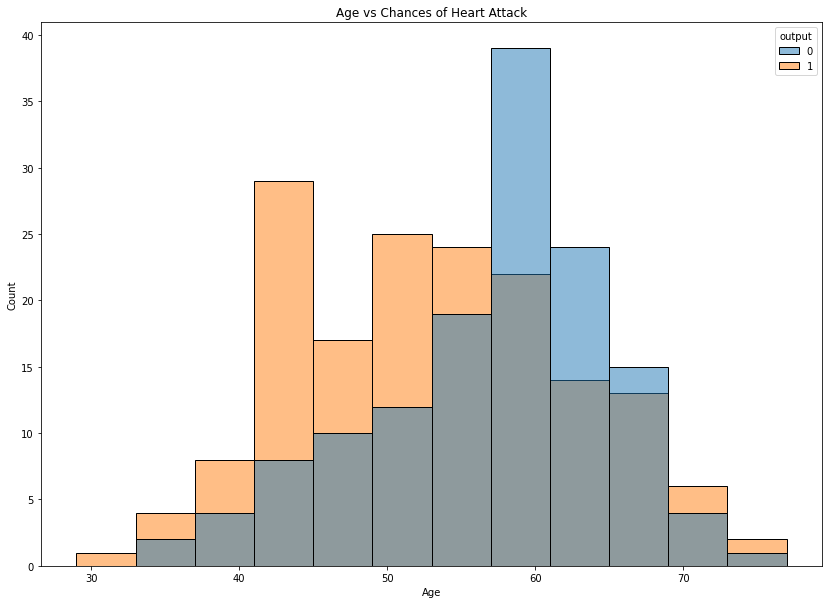

In [16]:
plt.figure(figsize=(14,10))
plt.title('Age vs Chances of Heart Attack')
sns.histplot(data=df,x='age',hue='output')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

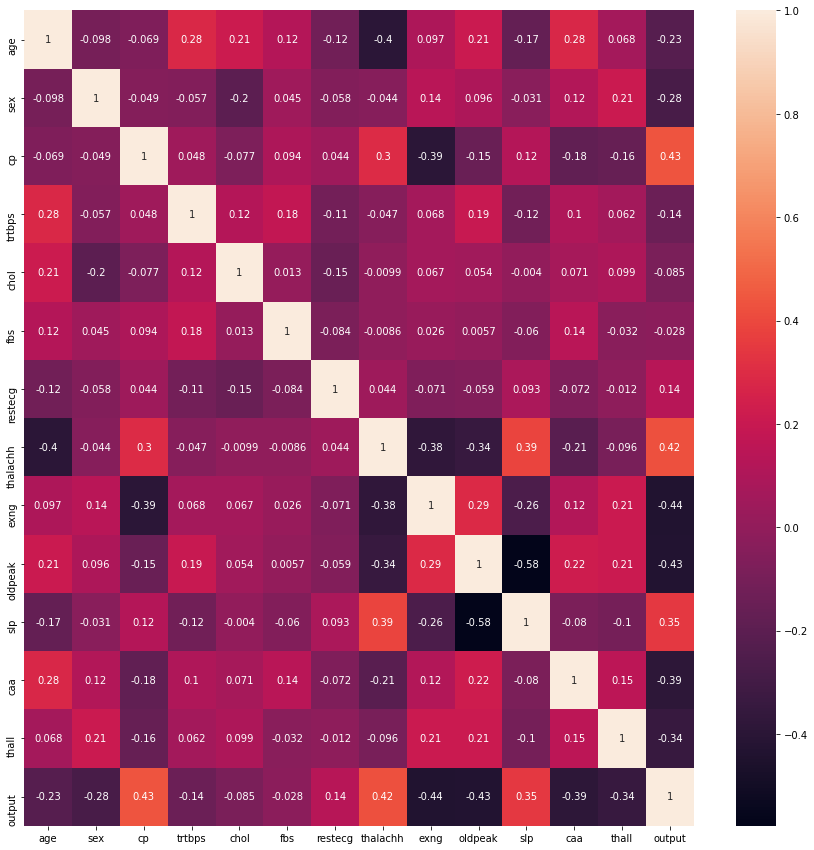

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

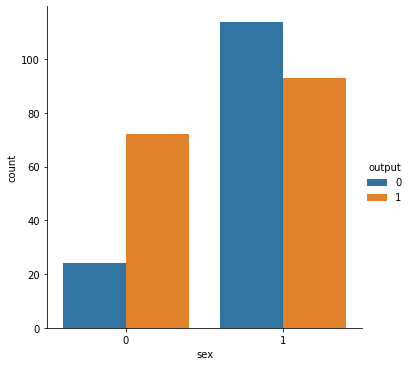

In [25]:
sns.catplot(x='sex', data=df, kind='count', hue='output')

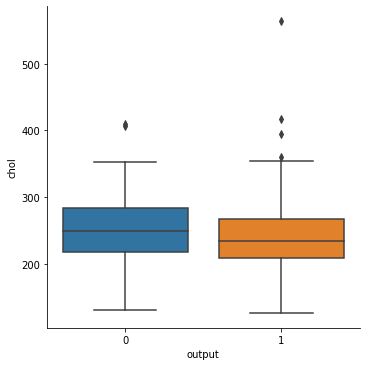

In [27]:
sns.catplot(x='output', data=df, y='chol', kind='box')

In [29]:
chest_pain=df['cp'].value_counts().reset_index()
chest_pain

,index,cp
0,0,143
1,2,87
2,1,50
3,3,23


<AxesSubplot:xlabel='index', ylabel='cp'>

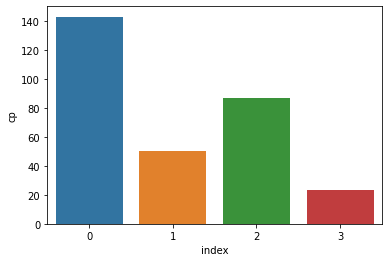

In [31]:
sns.barplot(x=chest_pain['index'],y=chest_pain['cp'])

In [32]:
df[['age','output']].value_counts().sort_values()

age  output
77   0          1
74   1          1
76   1          1
70   1          1
69   0          1
               ..
59   0          9
52   1          9
57   0         10
54   1         10
58   0         12
Length: 75, dtype: int64

In [35]:
risk_count = pd.crosstab(df['age'],df['output']).reset_index()
risk_count.columns = ['age','low risk','high risk']
risk_count

,age,low risk,high risk
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,2
5,39,1,3
6,40,2,1
7,41,1,9
8,42,1,7
9,43,3,5


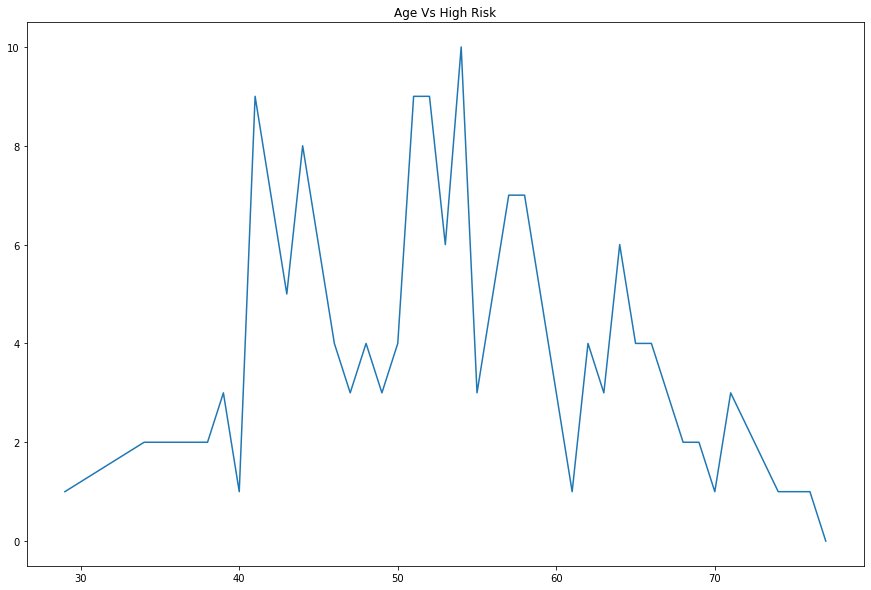

In [37]:
plt.figure(figsize=(15,10))
plt.title('Age Vs High Risk')
plt.plot(risk_count['age'],risk_count['high risk'])
plt.show()

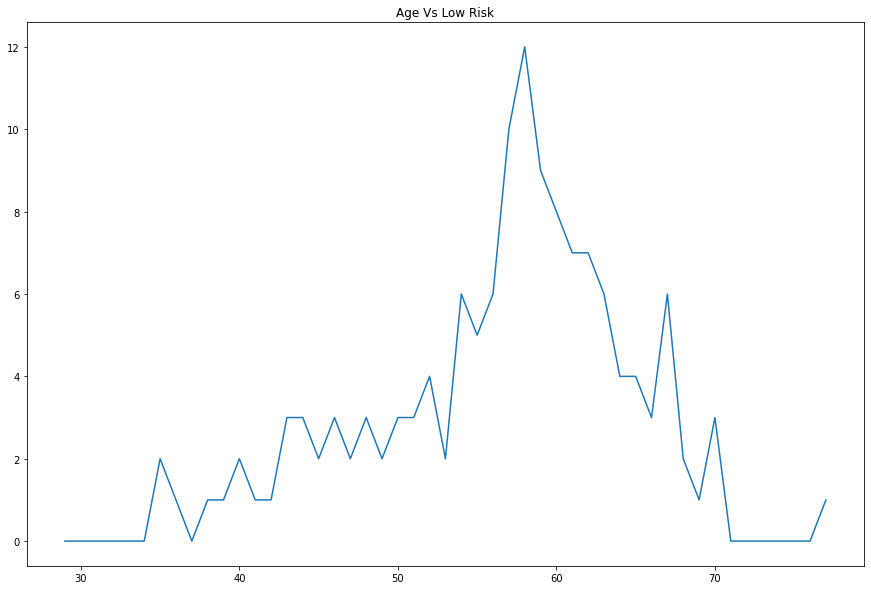

In [38]:
plt.figure(figsize=(15,10))
plt.title('Age Vs Low Risk')
plt.plot(risk_count['age'],risk_count['low risk'])
plt.show()

## Pre Processing

In [40]:
X=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[0:4]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ]])

In [42]:
y=df['output']
y[0:4]

0    1
1    1
2    1
3    1
Name: output, dtype: int64

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
print(f'Train Set: {X_train.shape,y_train.shape}')
print(f'Test Set: {X_test.shape,y_test.shape}')

Train Set: ((242, 13), (242,))
Test Set: ((61, 13), (61,))


## Modelling

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=14)

In [102]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [103]:
prediction=dtc.predict(X_test)

## Accuracy

In [51]:
from sklearn.metrics import accuracy_score

In [104]:
print(f'The accuracy of heart attack prediction model is {accuracy_score(y_test,prediction)*100}%')

The accuracy of heart attack prediction model is 83.60655737704919%


## Tree Plot

In [112]:
from sklearn.tree import plot_tree, export_graphviz

In [106]:
feature_names=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']

In [108]:
class_names=np.unique(y_train).astype(str)
class_names

array(['0', '1'], dtype='<U21')

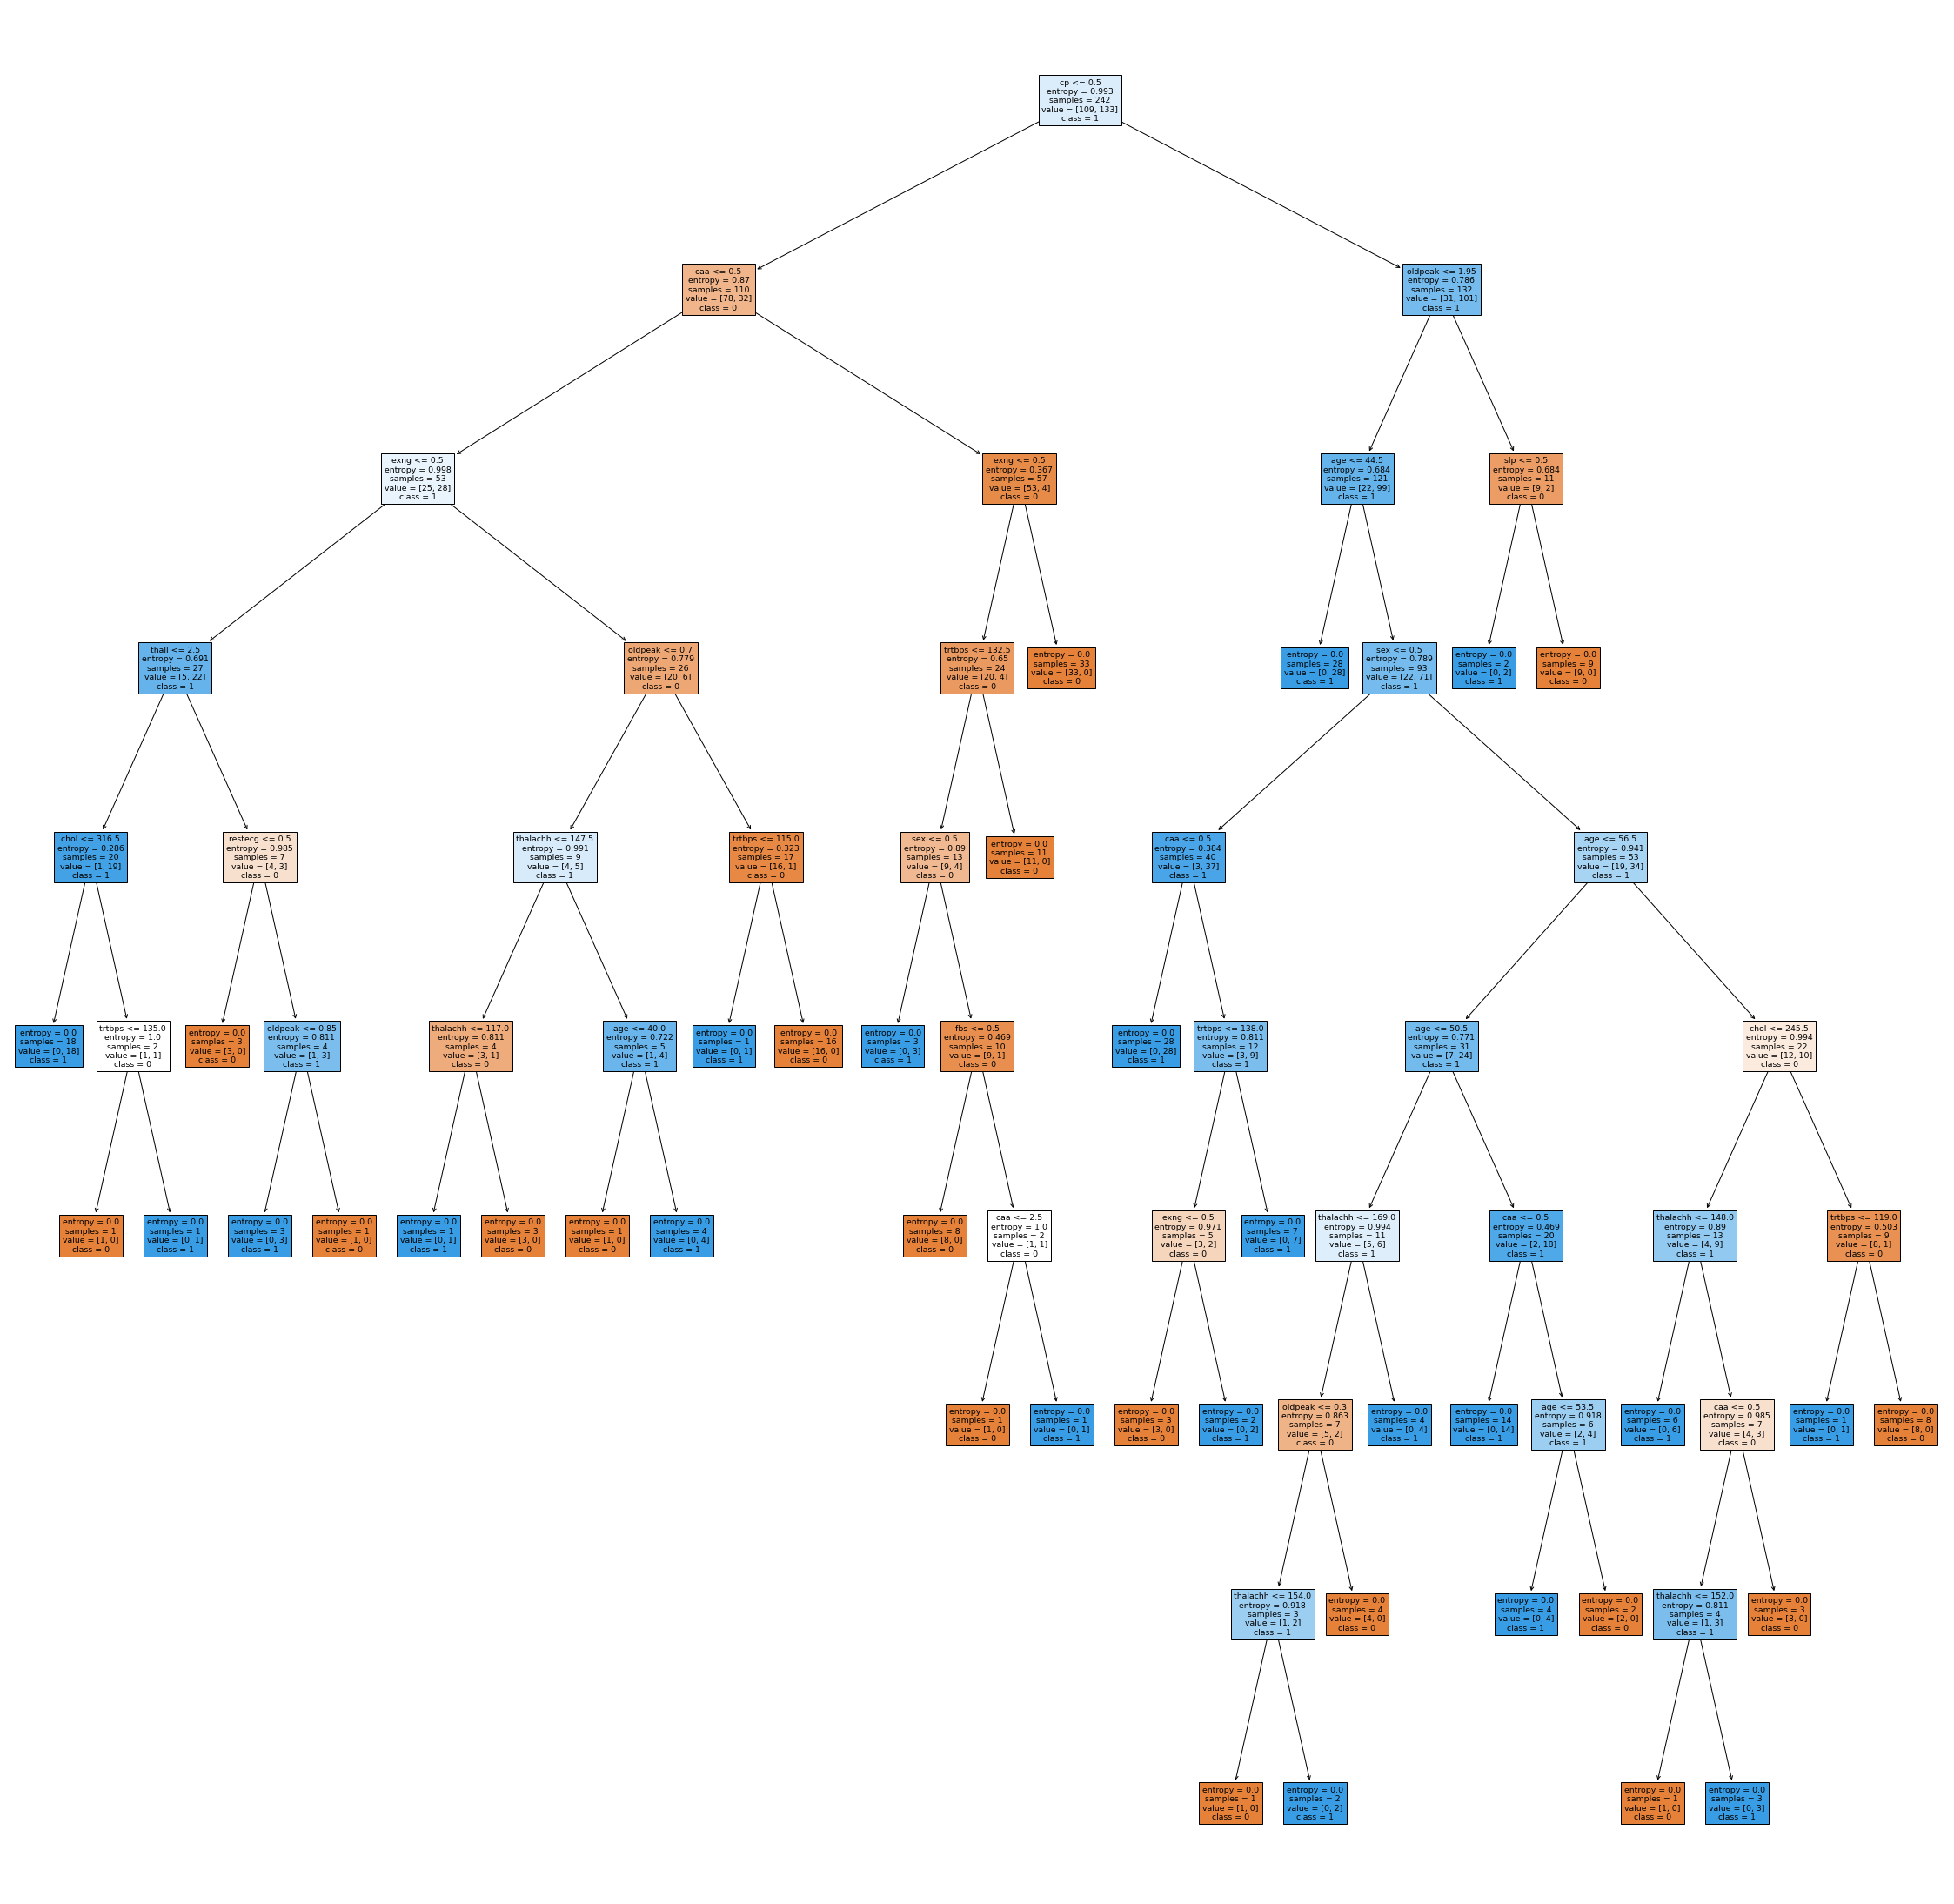

In [110]:
fig=plt.figure(figsize=(40,40))
_=plot_tree(dtc,feature_names=feature_names,class_names=class_names,filled=True)

In [114]:
export_graphviz(dtc,feature_names=feature_names,class_names=class_names,filled=True,out_file='heart_pred_dtc.dot')

In [115]:
plt.savefig("squares.png")

<Figure size 432x288 with 0 Axes>